In [647]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [648]:
# setting display options
(cols, rows) = (2, 10)
colors = sns.color_palette(n_colors=20)
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
rcParams["font.size"] = 14
rcParams["figure.figsize"] = 12, 8

In [649]:
df = pd.read_csv(filepath_or_buffer="s3://airflow-alphavantage-bucket/data/final/alphavantage.csv")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["year"].astype(str)
df["month"] = df["month"].astype(str)
df = df[df["date"] >= "2020-01-01"]

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 29206 to 33981
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    4776 non-null   datetime64[ns]
 1   10yr_treasury_yield     4776 non-null   float64       
 2   2yr_treasury_yield      4776 non-null   float64       
 3   30yr_treasury_yield     4776 non-null   float64       
 4   5yr_treasury_yield      4776 non-null   float64       
 5   consumer_price_index    4776 non-null   float64       
 6   consumer_sentiment      4776 non-null   float64       
 7   federal_interest_rate   4776 non-null   float64       
 8   gdp_per_capita          4776 non-null   float64       
 9   gross_domestic_product  4776 non-null   float64       
 10  inflation_expectation   4776 non-null   float64       
 11  inflation_rate          4776 non-null   float64       
 12  manufacturers_orders    4776 non-null   flo

In [651]:
economic_indicators = [
    "consumer_price_index",
    "consumer_sentiment",
    "federal_interest_rate",
    "gdp_per_capita",
    "gross_domestic_product",
    "inflation_expectation",
    "inflation_rate", 
    "manufacturers_orders",
    "nonfarm_payroll",
    "retail_sales",
    "unemployment",
    "2yr_treasury_yield",
    "5yr_treasury_yield",
    "10yr_treasury_yield",
    "30yr_treasury_yield"
]

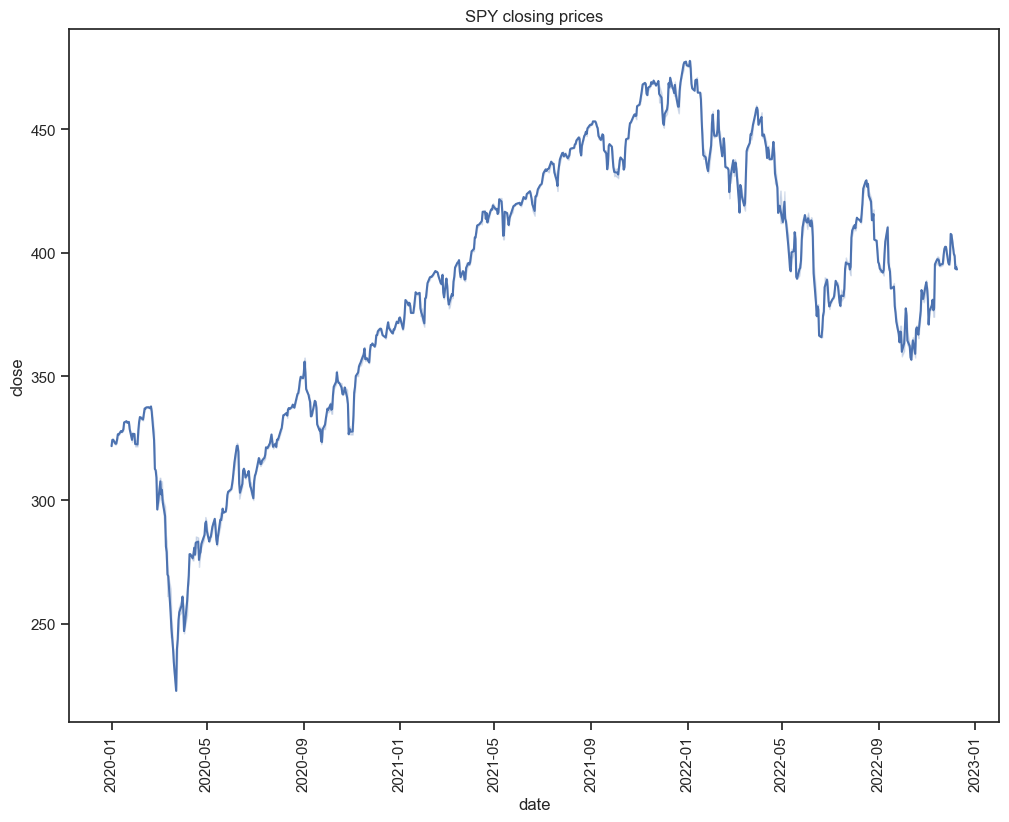

In [652]:
fig = plt.figure(figsize=(12, 9))

sns.set_theme(style="ticks")
ax = sns.lineplot(df, x="date", y="close")
ax.set(title="SPY closing prices")
plt.xticks(rotation=90)
plt.show()

In [653]:
scaler = MinMaxScaler()
scaler.fit(df[economic_indicators])
df[economic_indicators] = scaler.transform(df[economic_indicators])

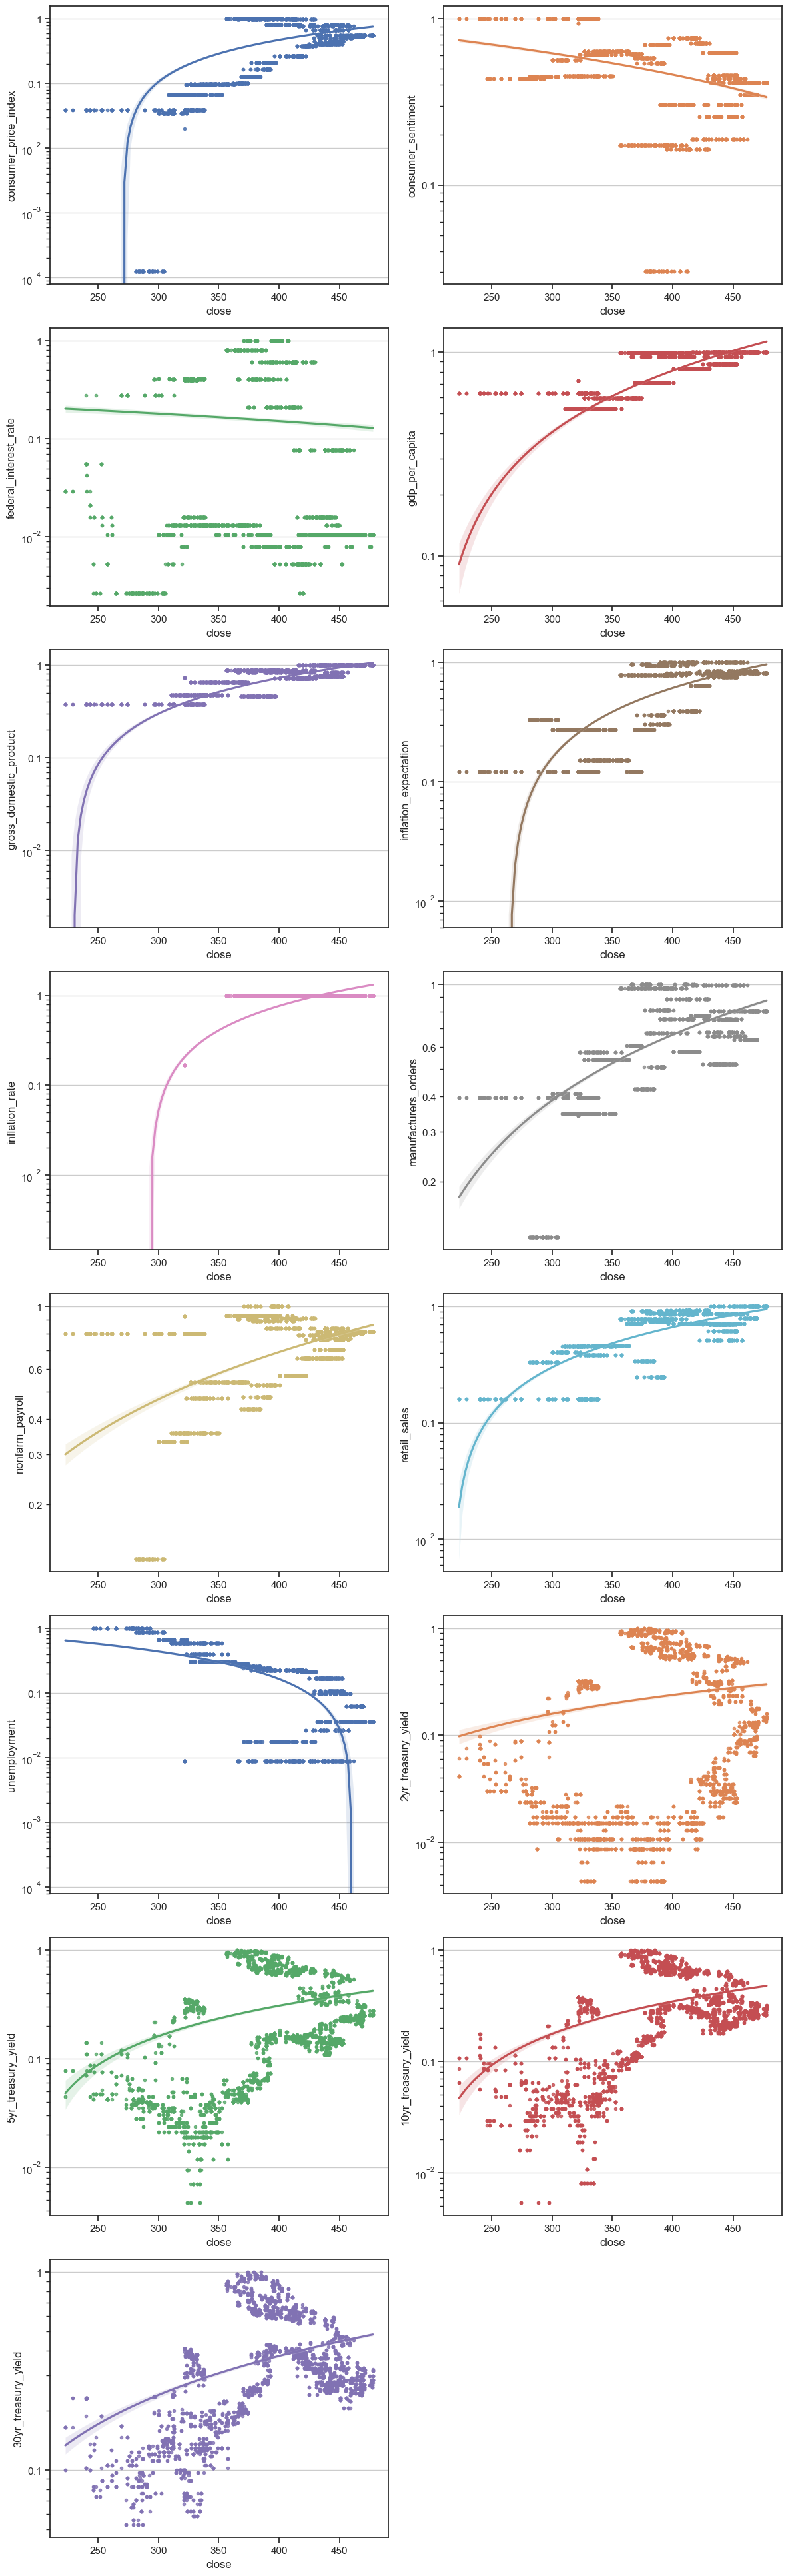

In [654]:
fig = plt.figure(figsize=(12, 48))

for key, value in enumerate(economic_indicators):
    sns.set_theme(style="ticks")
    ax = fig.add_subplot(rows, cols, key + 1)
    ax.set(yscale="log")
    ax.yaxis.grid(True)
    sns.regplot(df, x="close", y=value, ax=ax, color=colors[key], marker=".")
fig.tight_layout()
plt.show()

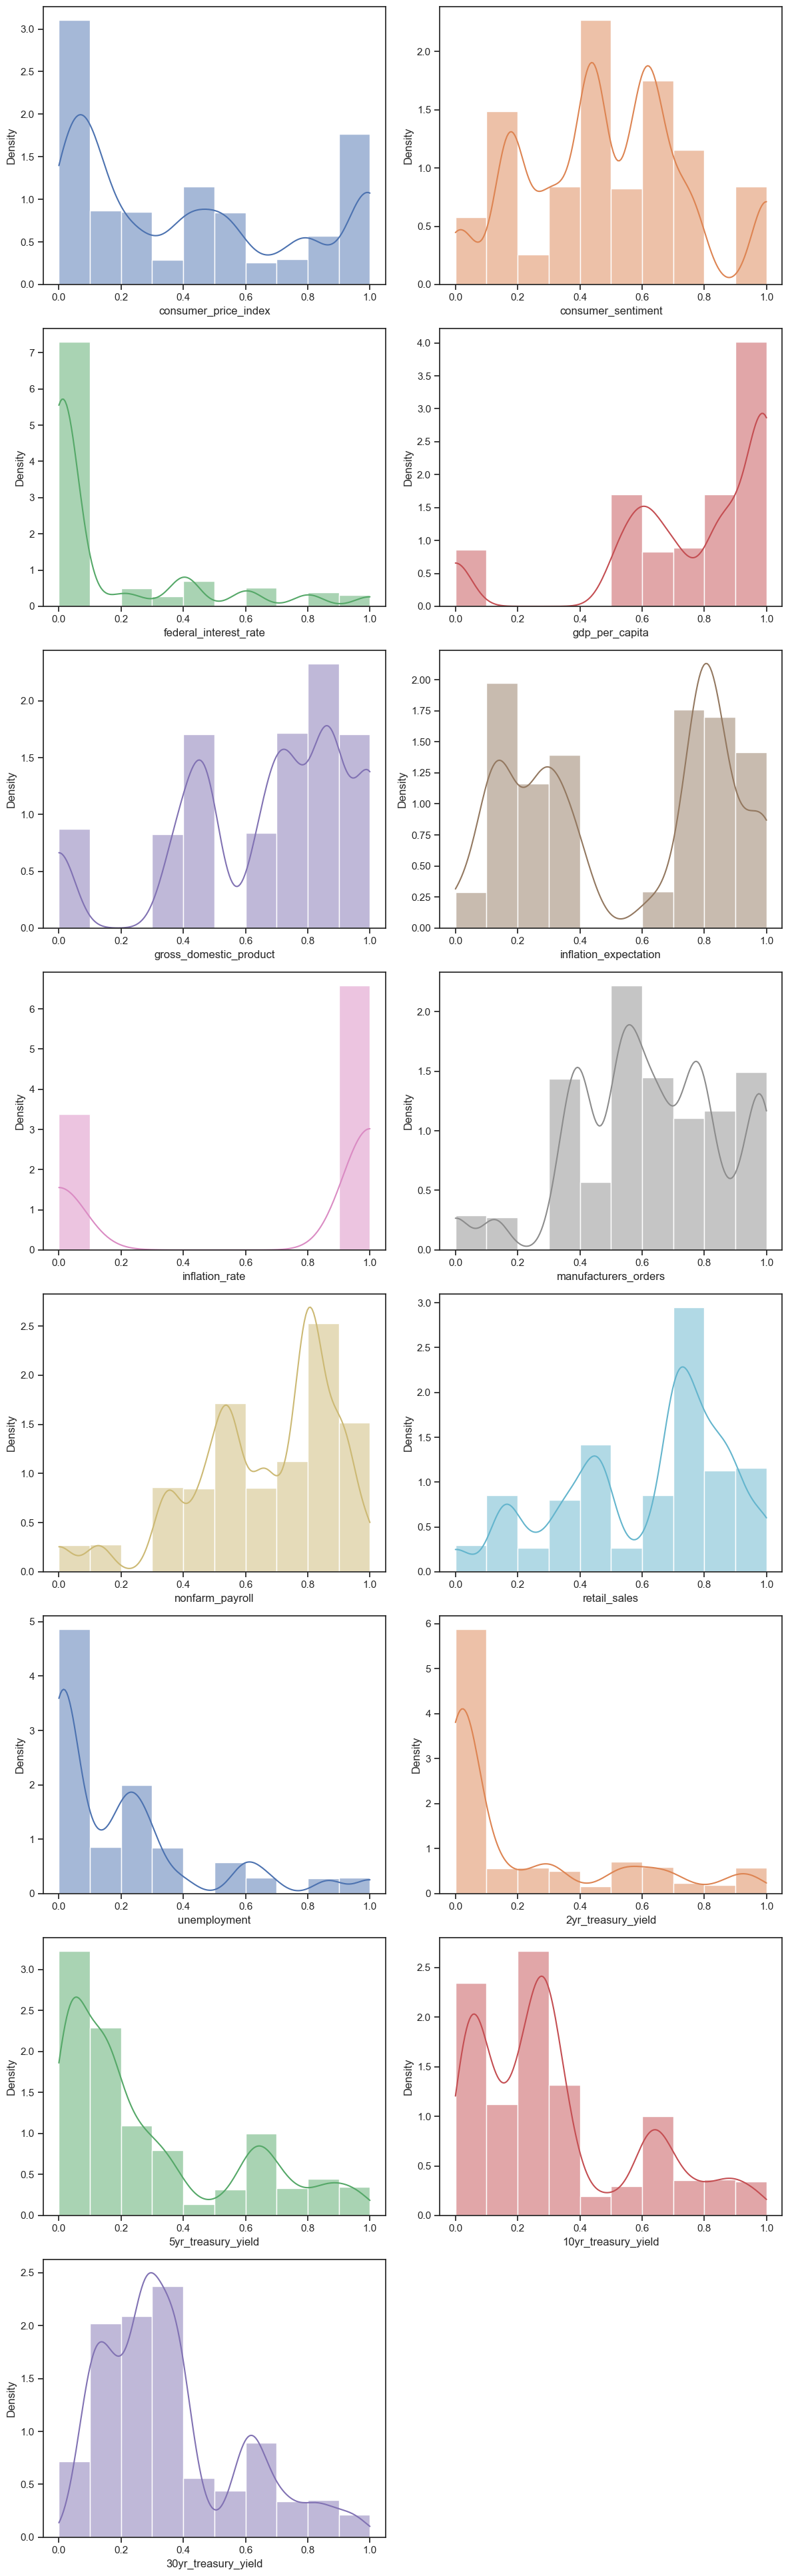

In [655]:
fig = plt.figure(figsize=(12, 48))

for key, value in enumerate(economic_indicators):
    sns.set_theme(style="ticks")
    ax = fig.add_subplot(rows, cols, key + 1)
    sns.histplot(df, x=value, ax=ax, bins=10, color=colors[key], kde=True, stat="density")
fig.tight_layout()  
plt.show()

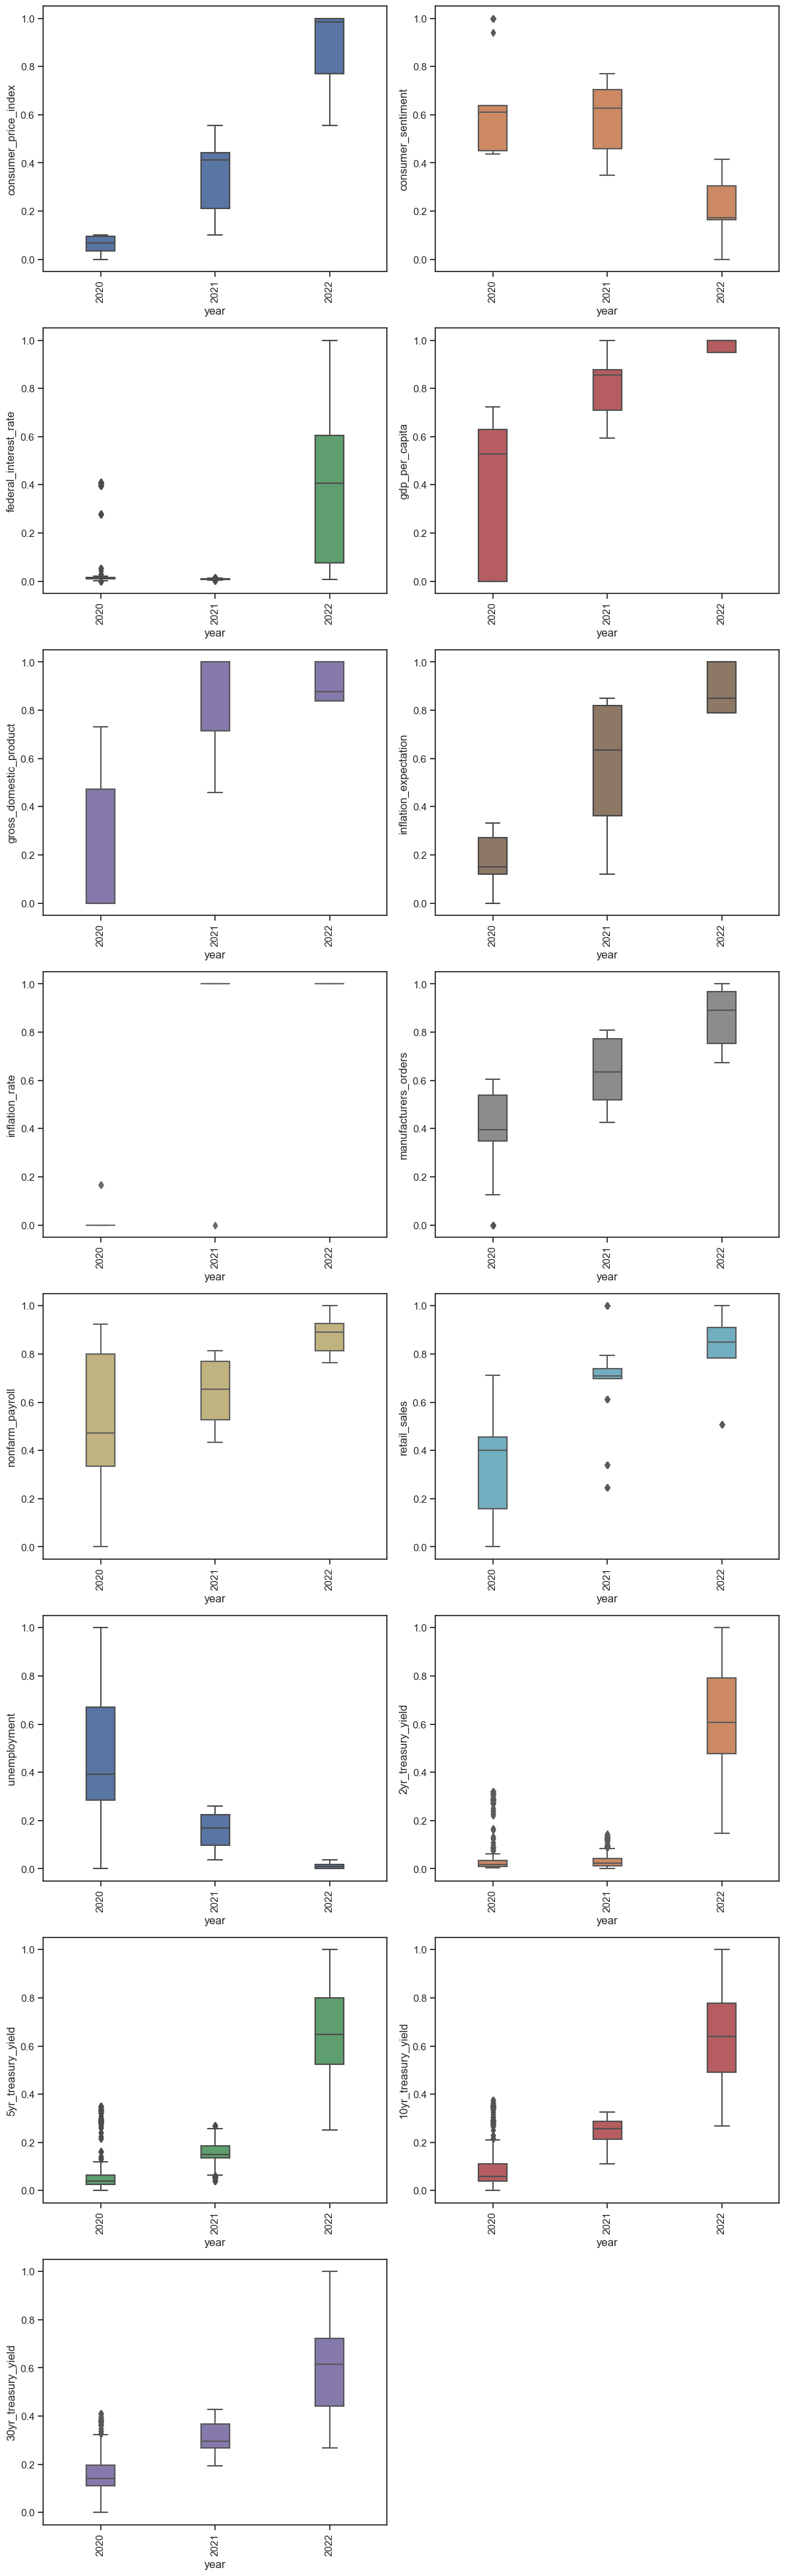

In [656]:
fig = plt.figure(figsize=(12, 48))

for key, value in enumerate(economic_indicators):
    sns.set_theme(style="ticks")
    ax = fig.add_subplot(rows, cols, key + 1)
    sns.boxplot(df, x="year", y=value, ax=ax, orient="v", color=colors[key], width=0.25)
    plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

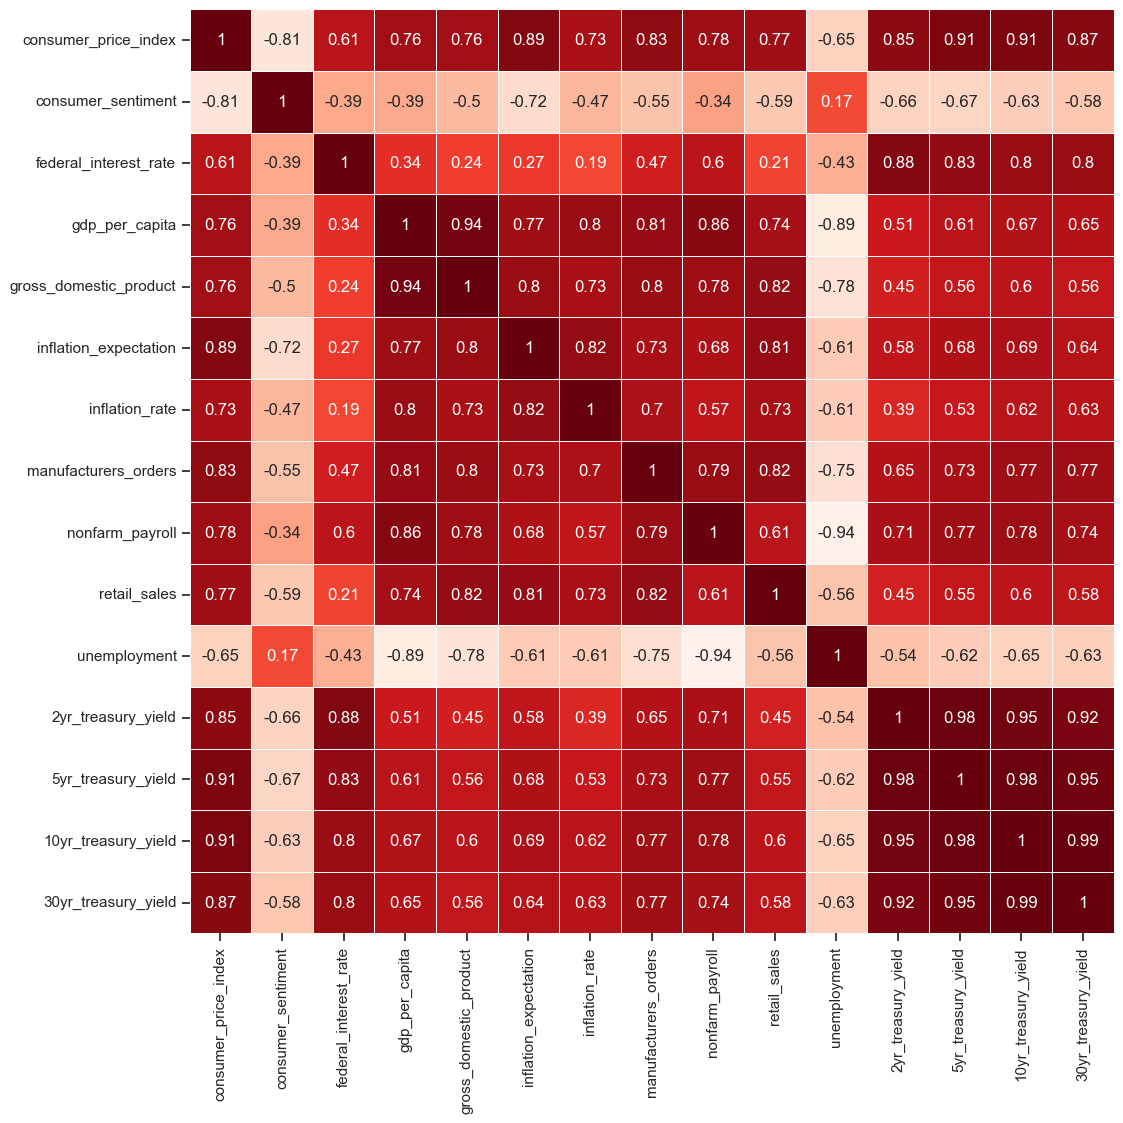

In [657]:
fig = plt.figure(figsize=(12, 12))

corr = df[economic_indicators].corr()
ax = sns.heatmap(
    data=corr, 
    annot=True, 
    cbar=False, 
    vmin=-1, 
    vmax=1, 
    center=0, 
    cmap="Reds", 
    square=True, 
    linewidths=0.5
)
plt.show()

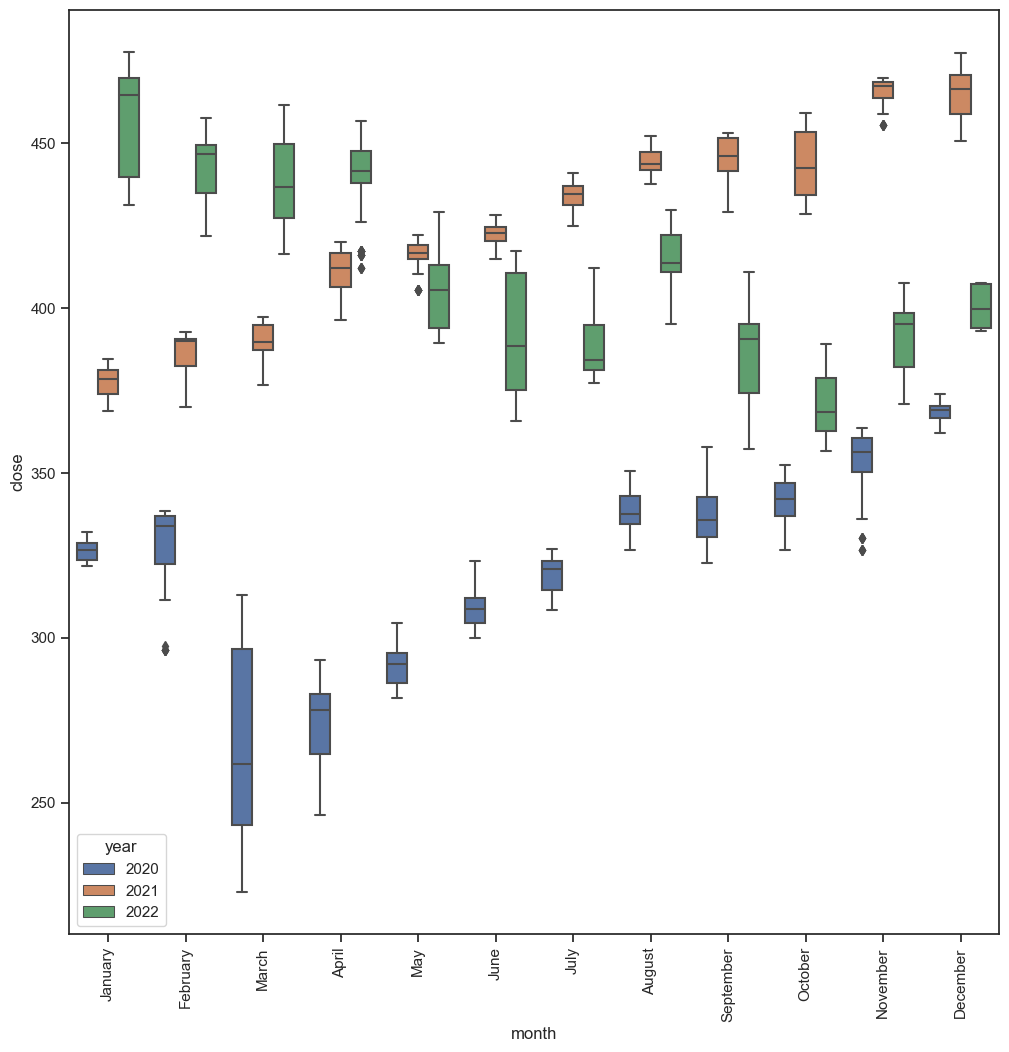

In [658]:
fig = plt.figure(figsize=(12, 12))

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.set_theme(style="ticks")
sns.boxplot(df, x="month", y="close", hue="year")
plt.xticks(rotation=90)
plt.show()

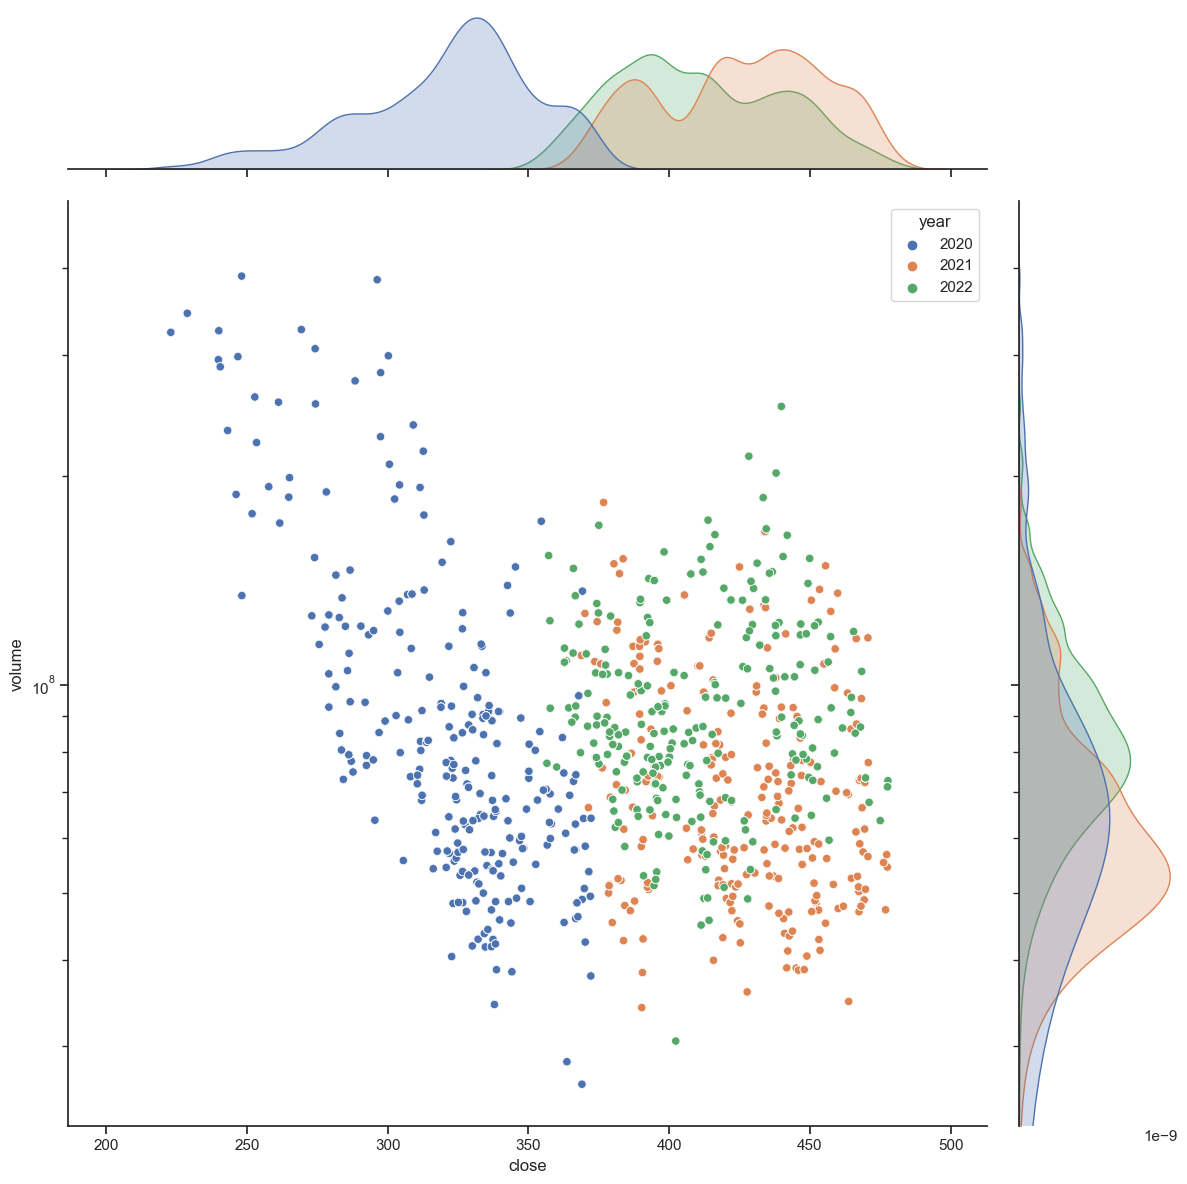

In [659]:
ax = sns.jointplot(data=df, x="close", y="volume", hue="year", height=12)
ax.ax_joint.set_yscale("log")
plt.show()